In [1]:
# Importing necessary libraries
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline

In [2]:
# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords


# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')   

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### 3.2 load the data

In [19]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [20]:
styled_df = df.head()
styled_df = styled_df.style.set_table_styles([
    {"selector": "th", "props": [("color", 'black'), ("background-color", "#FF00CC")]}
])
styled_df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",nan,nan,nan
1,ham,Ok lar... Joking wif u oni...,nan,nan,nan
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,nan,nan,nan
3,ham,U dun say so early hor... U c already then say...,nan,nan,nan
4,ham,"Nah I don't think he goes to usf, he lives around here though",nan,nan,nan


## Data Cleanning

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Drop the Columns

In [22]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [23]:
styled_df = df.head(5).style


# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#FF00CC"), ('font-weight', 'bold')]}
])

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


# Rename the colum

In [24]:
  # Rename the columns name
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

## Convert the target variable

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [26]:
styled_df = df.head().style


# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#FF00CC"), ('font-weight', 'bold')]}
])

,target,text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though"


# Check Missing values

In [27]:
#checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

## Check Duplicate values

In [28]:
#check duplicate values
df.duplicated().sum()

403

### Remove duplicate values

In [29]:
#remove Duplicate
df = df.drop_duplicates(keep = 'first')

## Shape of the dataset

In [30]:
df.shape

(5169, 2)

## Percentage of ham and spam

In [32]:
values = df['target'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 87.3669955503966
percentage of 1 : 12.633004449603405


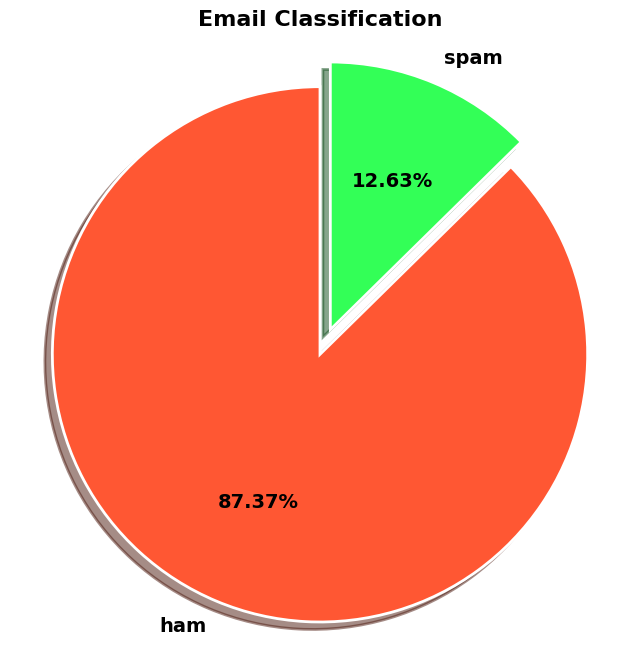

In [33]:
import matplotlib.pyplot as plt

# Sample data
# values = [75, 25]  # Example values for 'ham' and 'spam'

# Define custom colors
colors = ['#FF5733', '#33FF57']

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()

## Text length and Structure Analysis


In [34]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [35]:
df[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


### Summary Statistics for Leitimate Message

In [36]:
#ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


### Summary Statistics for Spam Messages

In [37]:
#spam
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


####  Character Length Distribution for Legitimate and Spam Messages

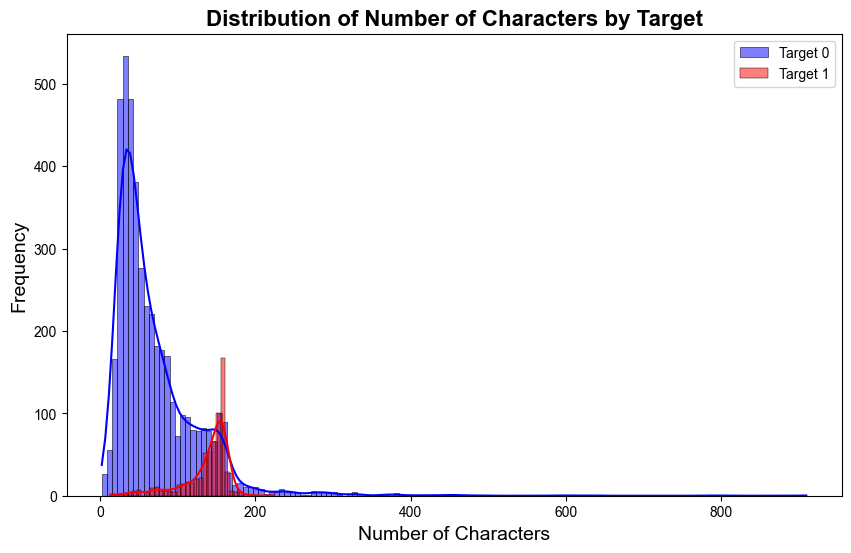

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

#### Word Count Distribution for Legitimate and Spam Messages

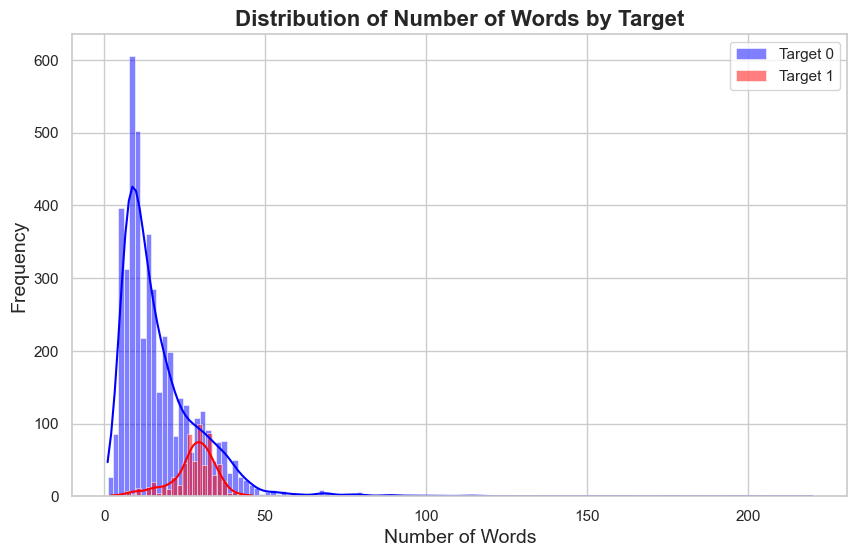

In [39]:
# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(df[df['target'] == 0]['num_words'], color='blue', label='Target 0', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(df[df['target'] == 1]['num_words'], color='red', label='Target 1', kde=True)

# Add labels and a title
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

#### Pairplot for Data Visualization

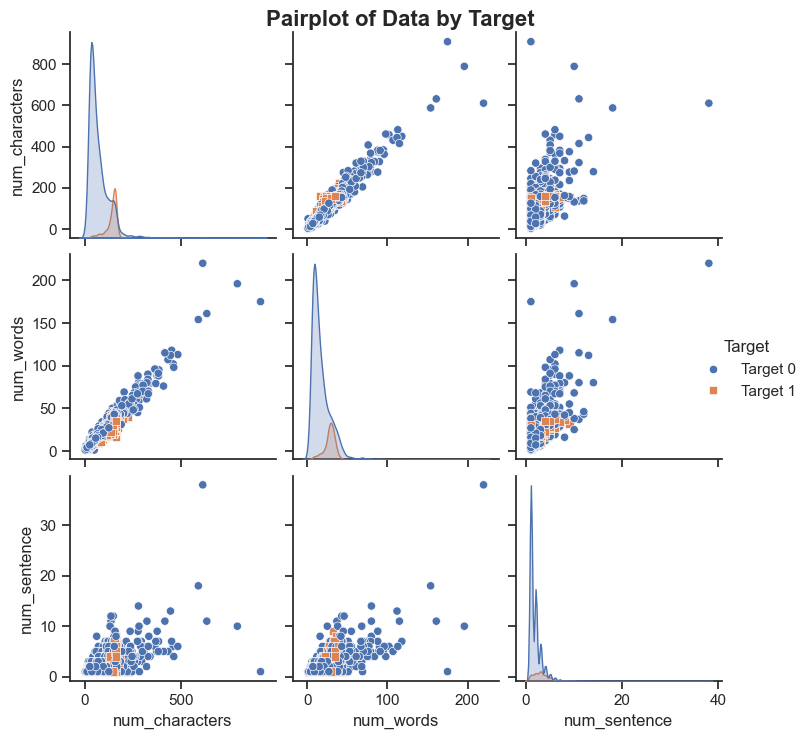

In [40]:
# Create a pairplot with custom styling
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(df, hue='target', diag_kind='kde', markers=["o", "s"])

# Set a title for the pairplot
g.fig.suptitle("Pairplot of Data by Target", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)  # Adjust the position of the title

# Customize the legend
g._legend.set_title('Target')
for t, l in zip(g._legend.texts, ["Target 0", "Target 1"]):
    t.set_text(l)

# Show the pairplot
plt.show()

#### Coorelation

In [41]:
df[['target','num_characters', 'num_words', 'num_sentence']].corr()

,target,num_characters,num_words,num_sentence
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentence,0.263939,0.624139,0.679971,1.000000


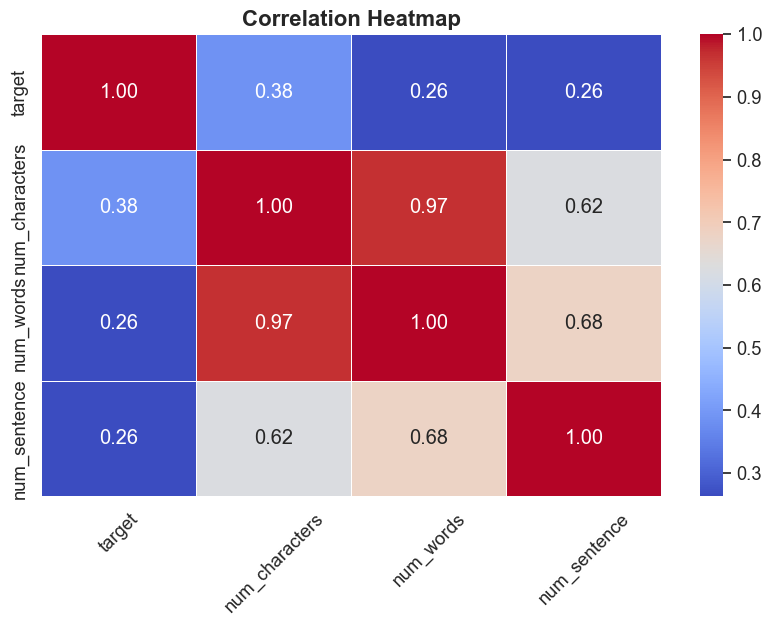

In [42]:
# Select the columns for the correlation matrix
correlation_matrix = df[['target', 'num_characters', 'num_words', 'num_sentence']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set a title for the heatmap
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the heatmap
plt.show()

#### Data preprocessing

In [47]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Removing stop words and punctuation
    text = y[:]
    y.clear()
    
    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(y)

In [44]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

#### Creating a New Column: 'transformed_text'

In [48]:
df['transformed_text'] = df['text'].apply(transform_text)

In [49]:

styled_df = df.head(5).style


# Modify the color and background color of the table headers (th)
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'Black'), ("background-color", "#FF00CC"), ('font-weight', 'bold')]}
])

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24,2,go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2,free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives around here though",61,15,1,nah think goe usf live around though


#### Word Cloud for Spam Messages

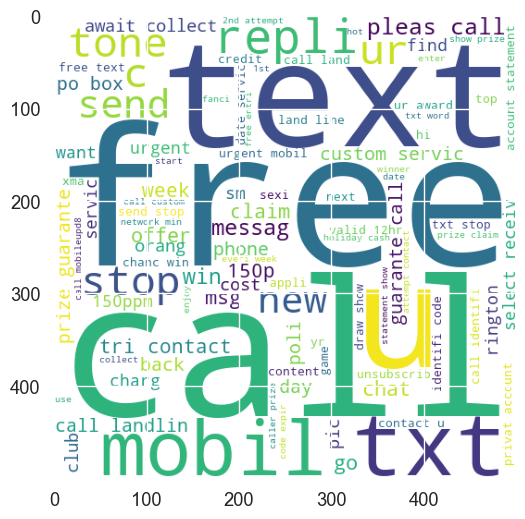

In [50]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

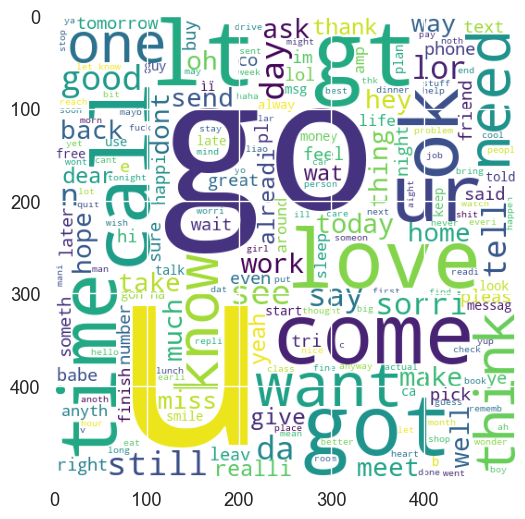

In [51]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

### Find top 30 words of spam

In [52]:
spam_carpos = []
for sentence in df[df['target'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

C:\Users\Pr\AppData\Local\Temp\ipykernel_13680\2359926171.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright');


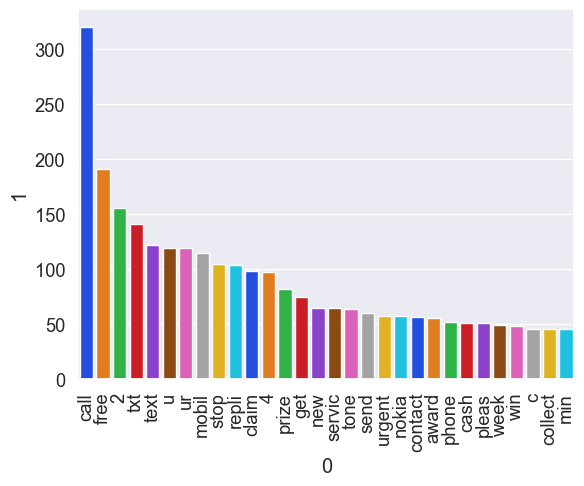

In [53]:
from collections import Counter
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright');
plt.xticks(rotation = 90)
plt.show()

### Find top 30 words of Not spam Messages

In [54]:
ham_carpos = []
for sentence in df[df['target'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

In [55]:
filter_ham_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

C:\Users\Pr\AppData\Local\Temp\ipykernel_13680\699915630.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')


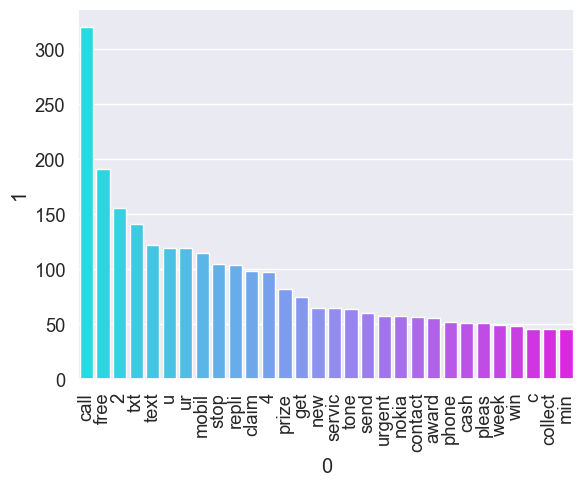

In [56]:
sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')
plt.xticks(rotation = 90)
plt.show()

#### Model Building

#### Initializing CountVectorizer and TfidfVectorizer

In [57]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

#### Dependent and Independent Variable

In [58]:
X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

#### Split into Train and Test Data

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

### Import the Models

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

### Initialize the Models

In [61]:
svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)    
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)


#### Dictionary of the Models

In [62]:
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
    
}

### Train the Models

In [63]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy , precision

#### Evaluate the Models

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Tes modèles
clfs = {
    'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

# Stockage des résultats
results = {
    "Modèle": [],
    "Accuracy": [],
    "Precision": [],
    "Recall (Spam)": [],
    "F1-Score (Spam)": [],
    "Score Moyen": []  # (Accuracy + Precision) / 2
}

# Evaluation de chaque modèle
for name, model in clfs.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    score_moyen = (accuracy + precision) / 2
    
    print(f"\n>>> {name} <<<")
    print("Accuracy :", accuracy)
    print("Precision:", precision)
    print("Recall (Spam):", recall)
    print("F1-Score (Spam):", f1)

    results["Modèle"].append(name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall (Spam)"].append(recall)
    results["F1-Score (Spam)"].append(f1)
    results["Score Moyen"].append(score_moyen)

# Tableau final
resultats_df = pd.DataFrame(results)
resultats_df = resultats_df.sort_values(by="Score Moyen", ascending=False)

print("\n=== Résultat Comparatif des Modèles ===")
print(resultats_df)



>>> SVC <<<
Accuracy : 0.9758220502901354
Precision: 0.9747899159663865
Recall (Spam): 0.8405797101449275
F1-Score (Spam): 0.9027237354085603

>>> KNN <<<
Accuracy : 0.9052224371373307
Precision: 1.0
Recall (Spam): 0.2898550724637681
F1-Score (Spam): 0.449438202247191

>>> NB <<<
Accuracy : 0.9709864603481625
Precision: 1.0
Recall (Spam): 0.782608695652174
F1-Score (Spam): 0.8780487804878049

>>> DT <<<
Accuracy : 0.9294003868471954
Precision: 0.8282828282828283
Recall (Spam): 0.5942028985507246
F1-Score (Spam): 0.6919831223628692

>>> LR <<<
Accuracy : 0.9584139264990329
Precision: 0.9702970297029703
Recall (Spam): 0.7101449275362319
F1-Score (Spam): 0.8200836820083682

>>> RF <<<
Accuracy : 0.9758220502901354
Precision: 0.9829059829059829
Recall (Spam): 0.8333333333333334
F1-Score (Spam): 0.9019607843137255

>>> Adaboost <<<
Accuracy : 0.9245647969052224
Precision: 0.8488372093023255
Recall (Spam): 0.5289855072463768
F1-Score (Spam): 0.6517857142857143

>>> Bgc <<<
Accuracy : 0.9584

Conclusion: In our evaluation of various classification algorithms, we observed the following key insights:

Support Vector Classifier (SVC) and Random Forest (RF) demonstrated the highest accuracy, both achieving approximately 97.58%.
Naive Bayes (NB) achieved a perfect precision score, indicating zero false positives.
Other models, including Gradient Boosting, Adaboost, Logistic Regression, and Bagging Classifier, displayed competitive performance with accuracy scores ranging from 94.68% to 96.03%.

The selection of the optimal model should consider factors beyond just accuracy, such as computational efficiency and the specific requirements of the application. It is advisable to perform further model fine-tuning and validation before making a final choice. </span>

In [94]:
from joblib import dump

# Sauvegarde
dump(mnb, "naive_bayes_model.joblib")
print("Modèle sauvegardé avec joblib.")


Modèle sauvegardé avec joblib.


In [97]:
import joblib

# Sauvegarde du vectorizer
joblib.dump(tfid, "tfid.joblib")
print("vectorizer sauvegardé avec joblib.")

vectorizer sauvegardé avec joblib.


In [98]:
# Chargement du modèle
model = joblib.load("naive_bayes_model.joblib")

# Chargement du vectorizer utilisé pour transformer les emails
vectorizer = joblib.load("tfid.joblib")

# Exemple d'utilisation
email = ["Ceci est un message important concernant votre compte bancaire."]
email_vectorized = vectorizer.transform(email)
prediction = model.predict(email_vectorized)

print("Prédiction :", prediction[0])


Prédiction : 0
